# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data


## Problem description

Services like Uber and Lyft have transformed urban transportation, offering flexibility and convenience to millions of users. This project leverages a comprehensive dataset from Kaggle, featuring Uber and Lyft trip data from Boston, to uncover patterns and relationships affecting ride prices, travel times, and service availability. The primary objective is to gain actionable insights that benefit both users and service providers.

The dataset contains detailed information about Uber and Lyft rides in Boston, including attributes such as date, time, pickup and drop-off coordinates, ride costs across different service categories, weather conditions, travel distance, and the impact of traffic congestion. Using this data, the project aims to understand pricing dynamics, such as how factors like time of day, day of the week, and weather influence ride prices. It also seeks to compare Uber and Lyft services to identify differences in pricing strategies, availability, and user experience

# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# dataset split
from sklearn.model_selection import train_test_split

# missing values imputing
from sklearn.impute import KNNImputer

np.random.seed(2024)

# Data loading

In [2]:
data = pd.read_csv('../input_data/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data info

In [3]:
sum(data.id.value_counts()>1)

0

It looks like we don't have any duplicates of rides, so we can get rid of id column.

In [4]:
data=data.drop(['id'],axis=1)

## Null values

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  object 
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  object 
 7   destination                  693071 non-null  object 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

In [6]:
data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

In [7]:
data.shape

(693071, 56)

In [8]:
data.nunique().sort_values()

timezone                           1
month                              2
cab_type                           2
uvIndex                            3
icon                               7
surge_multiplier                   7
short_summary                      9
latitude                          11
long_summary                      11
destination                       12
source                            12
longitude                         12
product_id                        13
name                              13
day                               17
moonPhase                         18
uvIndexTime                       20
temperatureHighTime               23
temperatureMaxTime                23
hour                              24
temperatureMinTime                25
windGustTime                      25
apparentTemperatureMaxTime        27
apparentTemperatureHighTime       27
precipProbability                 29
apparentTemperatureMinTime        29
temperatureLowTime                31
a

We have only 1 timezone so we can drop it.


In [9]:
data=data.drop(['timestamp'],axis=1)

In [10]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

        hour  day  month             datetime          timezone  \
137       12   26     11  2018-11-26 12:05:09  America/New_York   
140       10   29     11  2018-11-29 10:38:02  America/New_York   
821       19   26     11  2018-11-26 19:44:09  America/New_York   
923        7    2     12  2018-12-02 07:58:02  America/New_York   
951       23   28     11  2018-11-28 23:17:07  America/New_York   
...      ...  ...    ...                  ...               ...   
690736    10   16     12  2018-12-16 10:55:04  America/New_York   
691761     0   16     12  2018-12-16 00:55:05  America/New_York   
692491     4   27     11  2018-11-27 04:42:21  America/New_York   
692714    21   28     11  2018-11-28 21:38:08  America/New_York   
692819    21   13     12  2018-12-13 21:45:16  America/New_York   

                         source              destination cab_type  \
137               North Station                   Fenway     Uber   
140            Theatre District         Haymarket Square 

In [11]:
data.duplicated().sum()

np.int64(1493)

In [12]:
data = data.drop_duplicates()
data.shape

(691578, 55)

We got rid of duplicated rows

In [13]:
data.isnull().sum().sort_values(ascending=False)


price                          54542
day                                0
hour                               0
datetime                           0
timezone                           0
source                             0
month                              0
destination                        0
cab_type                           0
product_id                         0
name                               0
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
t

In [14]:
data  = data.dropna()


We removed null values

In [15]:
data['product_id'].sample(20)

185697                            lyft_premier
89603                              lyft_luxsuv
198737                               lyft_plus
481082                               lyft_line
102725    997acbb5-e102-41e1-b155-9df7de0a73f2
221911    55c66225-fbe7-4fd5-9072-eab1ece5e23e
232967                                lyft_lux
199318    6d318bcc-22a3-4af6-bddd-b409bfce1546
104996                               lyft_plus
465091                             lyft_luxsuv
388310    6c84fd89-3f11-4782-9b50-97c468b19529
410205    6c84fd89-3f11-4782-9b50-97c468b19529
317497                                lyft_lux
341168    55c66225-fbe7-4fd5-9072-eab1ece5e23e
123796                            lyft_premier
639859    55c66225-fbe7-4fd5-9072-eab1ece5e23e
228320    6c84fd89-3f11-4782-9b50-97c468b19529
76102     9a0e7b09-b92b-4c41-9779-2ad22b4d779d
329687                             lyft_luxsuv
218812    6c84fd89-3f11-4782-9b50-97c468b19529
Name: product_id, dtype: object

In [16]:
data=data.drop(['product_id'],axis=1)

We can also get rid of latitude and longitude

In [17]:
data=data.drop(['latitude','longitude'],axis=1)

In [18]:
data.groupby(['cab_type','name'])['price'].sum()


cab_type  name        
Lyft      Lux              910030.50
          Lux Black       1180610.55
          Lux Black XL    1655327.05
          Lyft             492105.18
          Lyft XL          783702.20
          Shared           308772.50
Uber      Black           1128434.50
          Black SUV       1665437.00
          UberPool         481301.00
          UberX            536743.00
          UberXL           862512.00
          WAV              536755.50
Name: price, dtype: float64

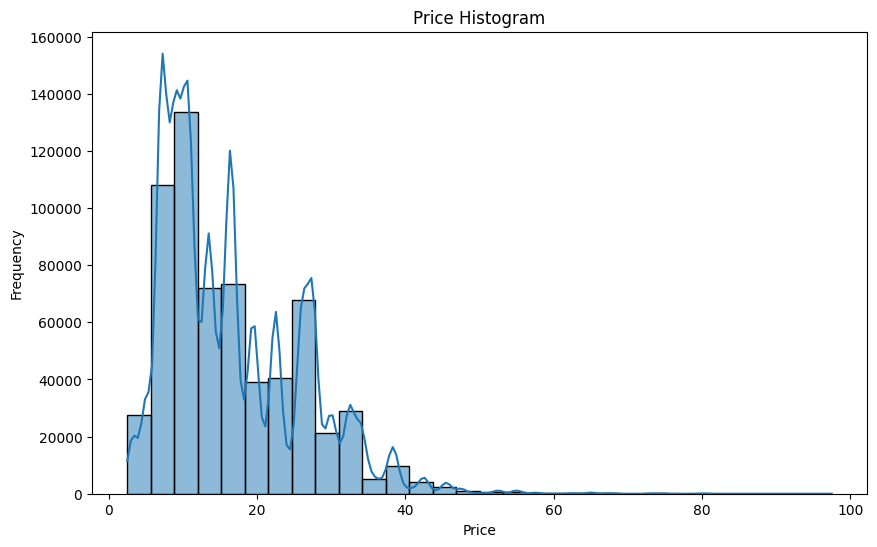

In [19]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

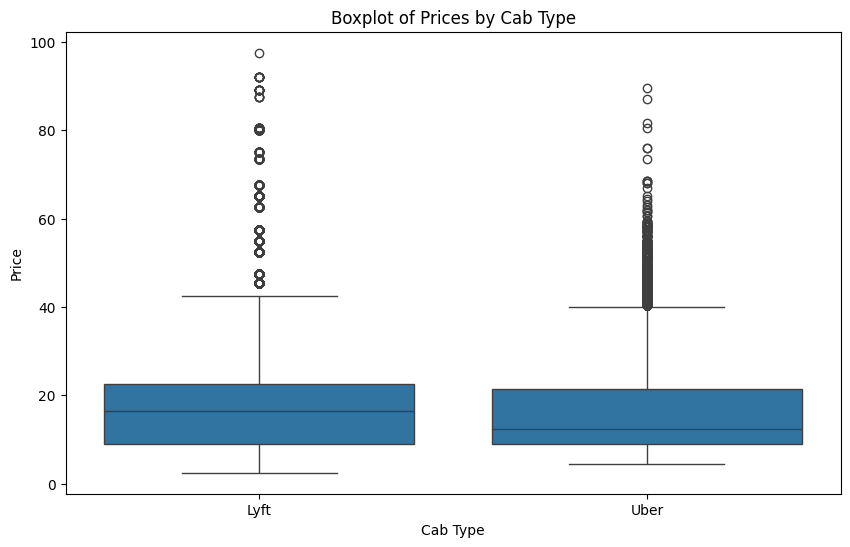

In [20]:
# Boxplot of prices by cab type
plt.figure(figsize=(10, 6))
sns.boxplot(x='cab_type', y='price', data=data)
plt.title('Boxplot of Prices by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()

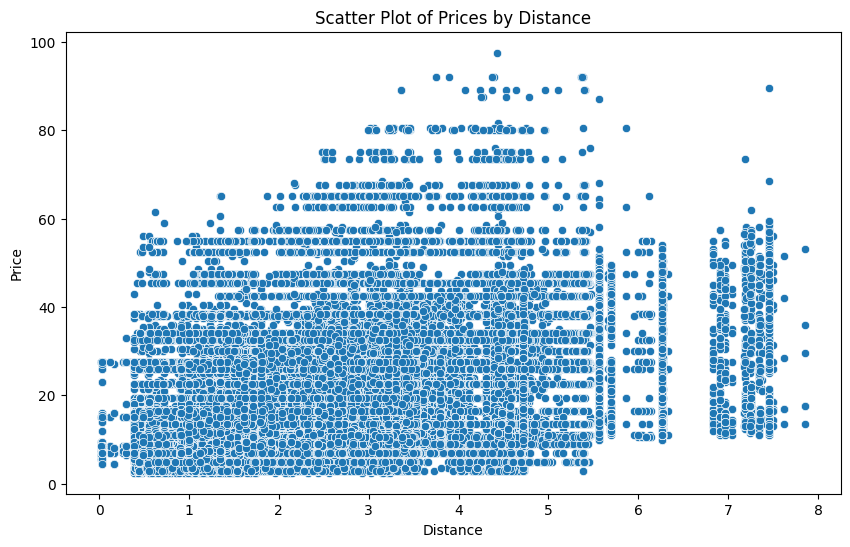

In [21]:

# Scatter plot of prices by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Scatter Plot of Prices by Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()